<a href="https://colab.research.google.com/github/bhumi2123/Data_analysis/blob/main/Project_1_Analyzing_Amazon_Sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

# %matplotlib inline is a command that enables Matplotlib plots to be displayed inline in Jupyter Notebook, instead of opening a separate window.
%matplotlib inline

#  Using the pd.read_csv() function to read in a CSV file named "Amazon Sales Records.csv" and stores the data in a Pandas DataFrame named data. The encoding parameter is set to 'latin-1', which specifies the character encoding used in the CSV file.
data = pd.read_csv("Amazon Sales data.csv",encoding = 'latin-1')

In [3]:
# Show dataframe
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
# Show columns present in dataframe
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [5]:
# Show basic information of dataframe like null value count of each column and their data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [6]:
# Changing the data type of different column for model training and analysis
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [7]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [8]:
# Using describe function on dataframe for getting basic stats of numerical dataset
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
# Adding extra column to dataframe which contain only month, year and month with year
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [10]:
# Group by month, year, and yearly_month and calculate sales trends
monthly_sales = data.groupby('Order Month')['Total Revenue'].sum()
yearly_sales = data.groupby('Order Year')['Total Revenue'].sum()
yearly_monthly_sales = data.groupby('Order Date MonthYear')['Total Revenue'].sum()

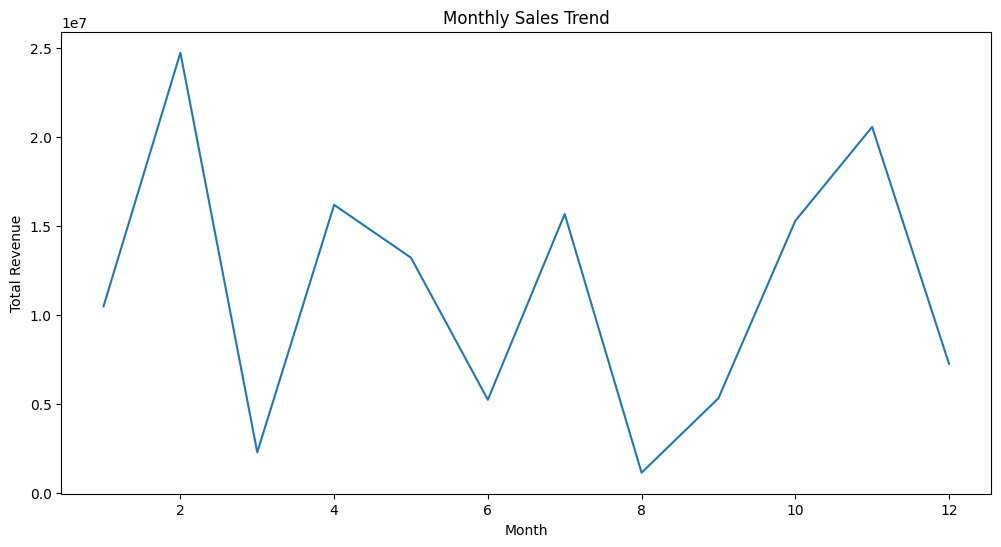

In [13]:
import matplotlib.pyplot as plt
# Load - Visualize the trends
# Month-wise trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

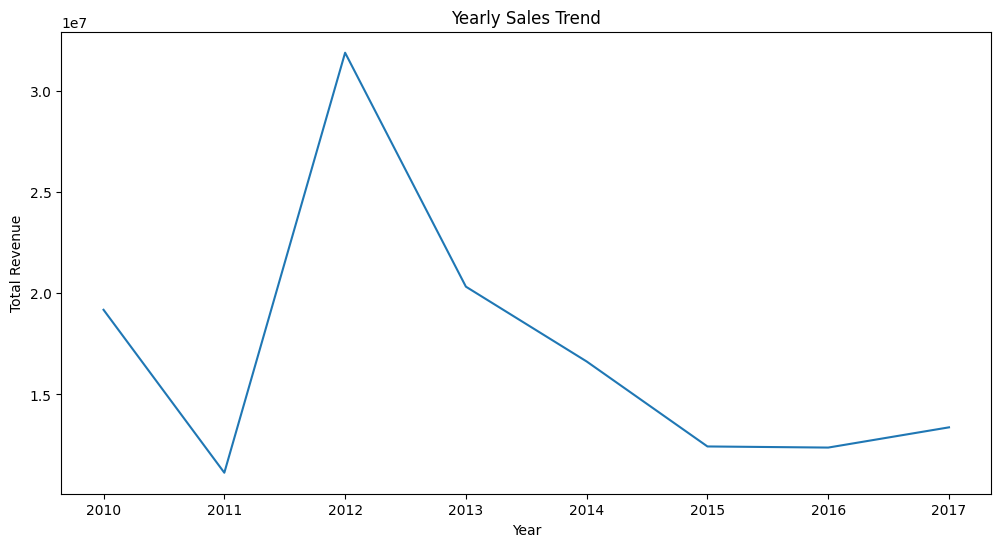

In [14]:
# Year-wise trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

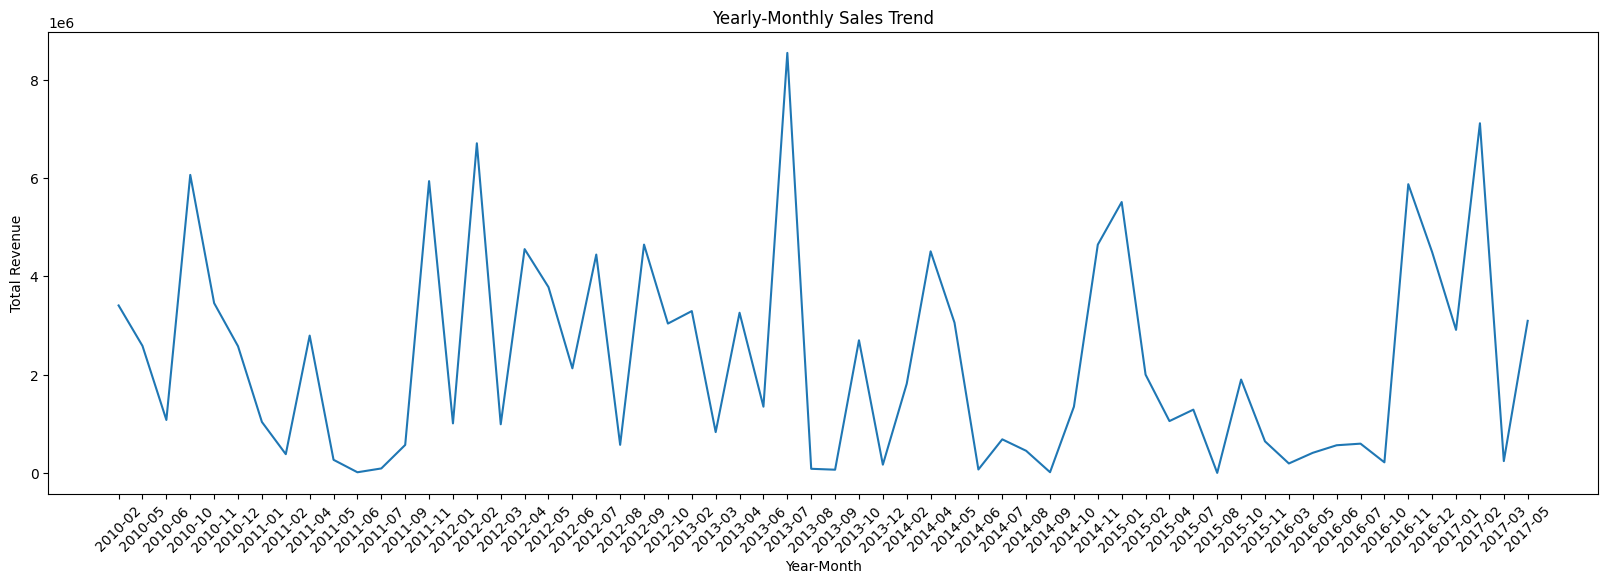

In [15]:
# Yearly-Month-wise trend
plt.figure(figsize=(20, 6))
sns.lineplot(x=yearly_monthly_sales.index, y=yearly_monthly_sales.values)
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Saving the data dataframe to df
df = data

In [17]:
# Checking out total null value in the all the column of dataframe
df.isnull().sum()

Region                  0
Country                 0
Item Type               0
Sales Channel           0
Order Priority          0
Order ID                0
Ship Date               0
Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
Total Profit            0
Order Month             0
Order Year              0
Order Date MonthYear    0
dtype: int64

In [18]:
# Display total values of all country
pd.set_option('display.max_rows', None)
df['Country'].value_counts()

The Gambia                          4
Sierra Leone                        3
Sao Tome and Principe               3
Mexico                              3
Australia                           3
Djibouti                            3
Switzerland                         2
Myanmar                             2
Norway                              2
Turkmenistan                        2
Cameroon                            2
Bulgaria                            2
Honduras                            2
Azerbaijan                          2
Libya                               2
Rwanda                              2
Mali                                2
Gabon                               1
Belize                              1
Haiti                               1
Lithuania                           1
San Marino                          1
United Kingdom                      1
Austria                             1
Fiji                                1
Madagascar                          1
Cote d'Ivoir

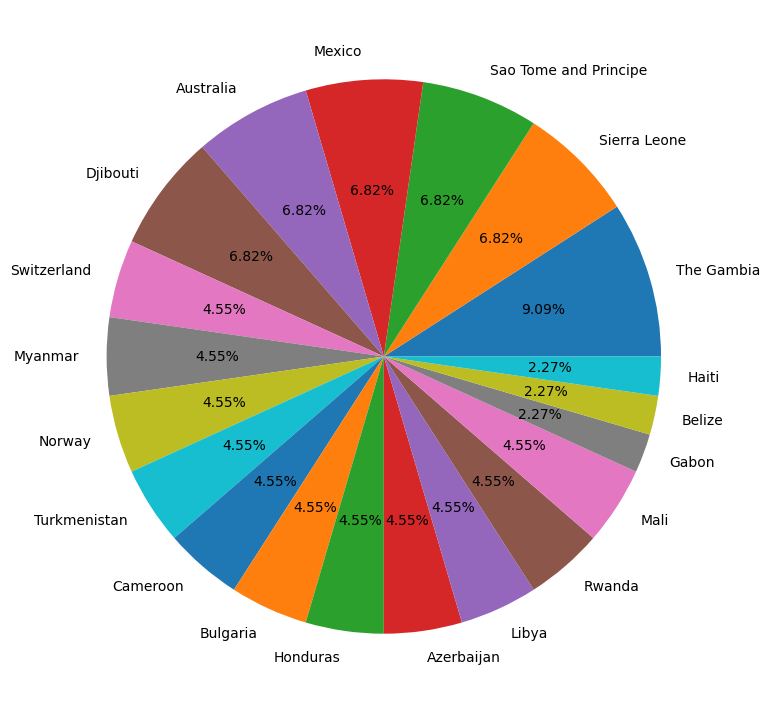

In [19]:
import matplotlib.pyplot as plt
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values
# Pie Chart for top 20 country
fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

#**Exploratory Data Analysis**
##Checking Outliers in the dataframe

Box Plot for Total Profit

The initial line imports the 'pyplot' module from Matplotlib and assigns it the alias 'plt'. Following that, the 'Seaborn' library is imported, and the plot style is configured to 'white'. Subsequently, a figure is generated with dimensions 10 inches by 2 inches using the 'subplots()' function, and the resulting plot object is stored in variables 'fig' and 'ax' for further customization. The fourth line produces a boxplot of the 'Total Profit' variable in the dataset utilizing Seaborn's 'boxplot()' function. The box color is specified as 'plum' with a box width of 0.6. A title is added to the plot with a font size of 13, and a label is assigned to the x-axis. Finally, the plot is displayed using the 'show()' function.

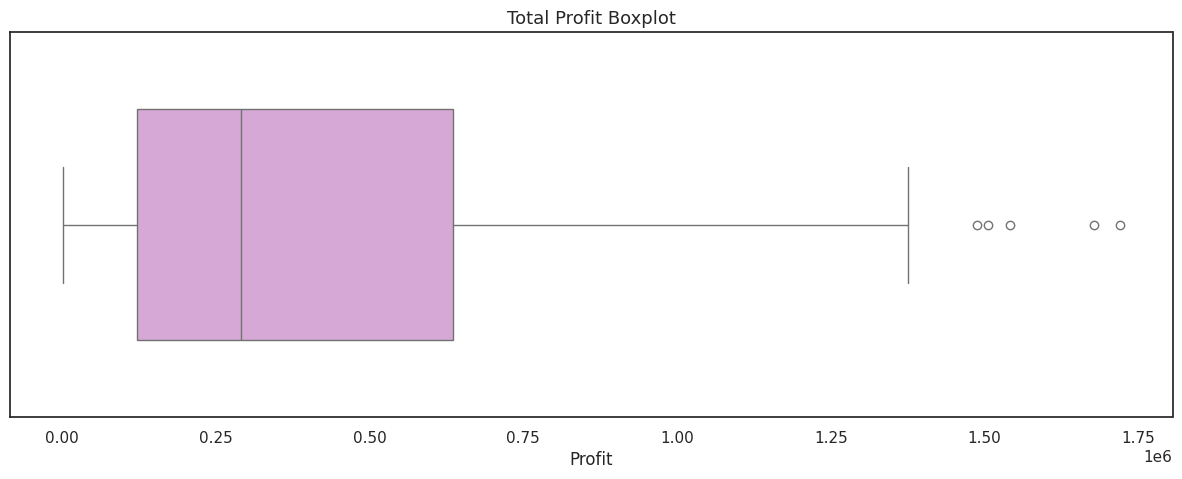

In [20]:
import matplotlib.pyplot as plt
sns.set(style='white')
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=data['Total Profit'], color="plum", width=.6)

plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

The 'detect_outliers' function accepts two parameters: a pandas DataFrame named 'dataframe' and a column identifier 'column.' Its purpose is to identify outliers in the specified column using the Z-score method.

Utilizing the Z-score method, which assumes a normal distribution of data, outliers are recognized as values that deviate beyond a certain number of standard deviations from the mean. In this instance, the threshold is defined as 2 standard deviations.

Initially, the function computes the mean and standard deviation of the designated column. It iterates through each value in the column, computes its Z-score, and examines whether the absolute Z-score surpasses the predefined threshold. If so, the function appends the index of the outlier to a list and prints the corresponding row from the DataFrame. Ultimately, the function returns the list containing indices of the identified outliers.

It's noteworthy that the function necessitates the 'numpy' library to be imported and assumes that the column values are numeric. Additionally, the function prints the rows in the DataFrame where outliers are detected; however, this may not be optimal for large DataFrames.

In [21]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [22]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [23]:
# Print rows where outlier is present for the Total Profit column value
print(outliers)


[13, 30, 33, 46, 74, 79, 93]


In [24]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Profit column of dataframe data ")

The list has 7 outliers in Total Profit column of dataframe data 


###Box Plot of Total Cost

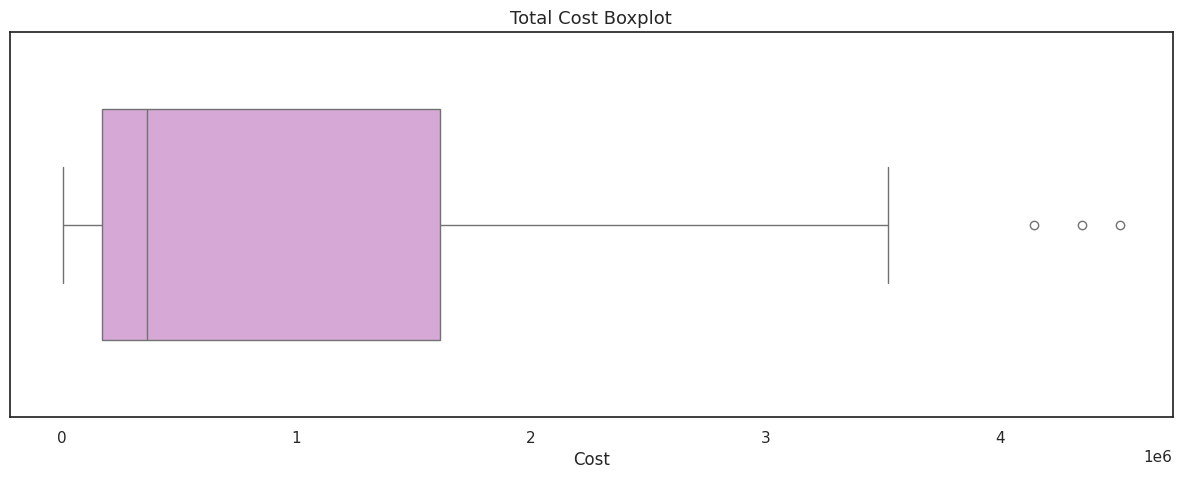

In [25]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=data['Total Cost'], color="plum", width=.6)

plt.title('Total Cost Boxplot', fontsize=13)
plt.xlabel('Cost')
plt.show()


In [26]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [27]:
outliers = detect_outliers(df, df["Total Cost"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [28]:
# Print rows where outlier is present for the Total Cost column value
print(outliers)

[13, 33, 38, 68, 75]


In [29]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Cost column of dataframe data ")

The list has 5 outliers in Total Cost column of dataframe data 


###Box Plot of Total Revenue

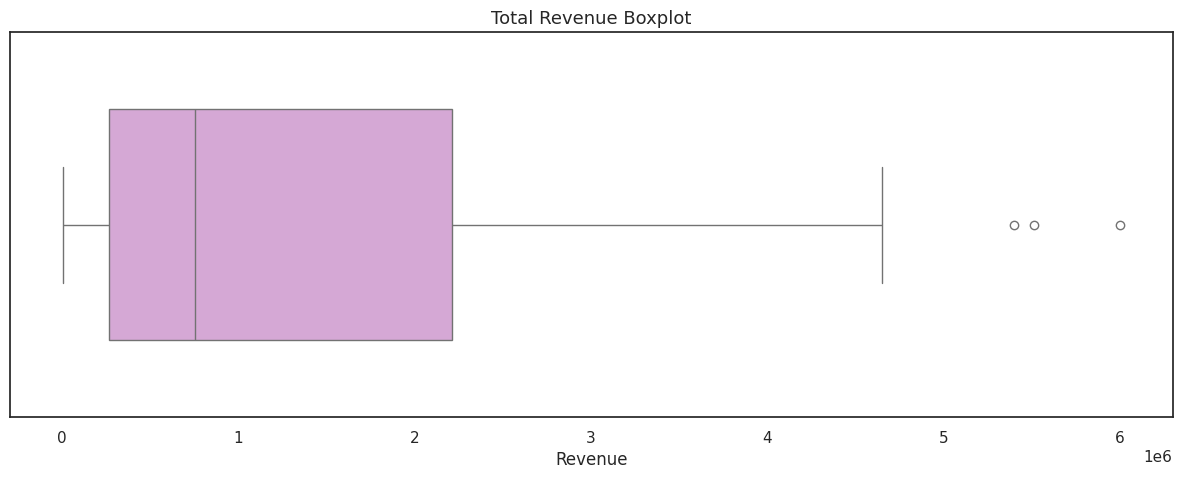

In [30]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x=data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [31]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 3rd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [32]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [33]:
# Print rows where outlier is present for the Total Revenue column value
print(outliers)


[13, 33, 38, 68, 74, 75]


In [34]:
list_length = len(outliers)

# Print the number of values in the list
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


###Box Plot of Unit Cost

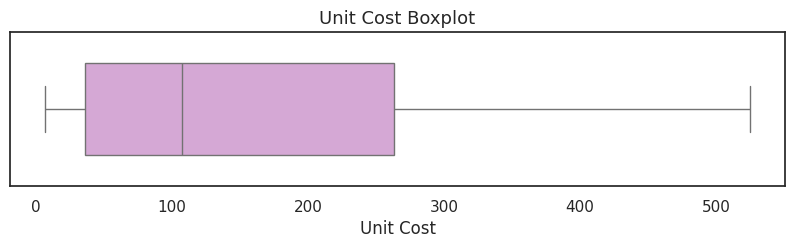

In [35]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(x=data['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

###Box Plot of Unit Price

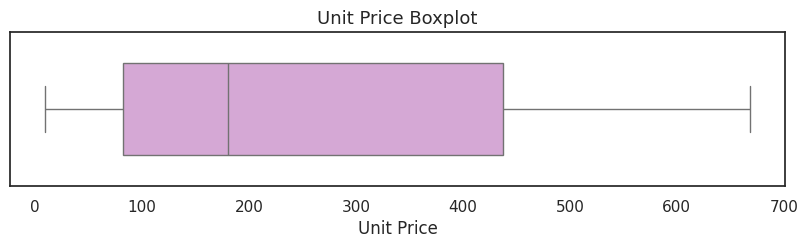

In [36]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(x=data['Unit Price'], color="plum", width=.6)
plt.title('Unit Price Boxplot', fontsize=13)
plt.xlabel('Unit Price')
plt.show()



###Box Plot of Unit Sold

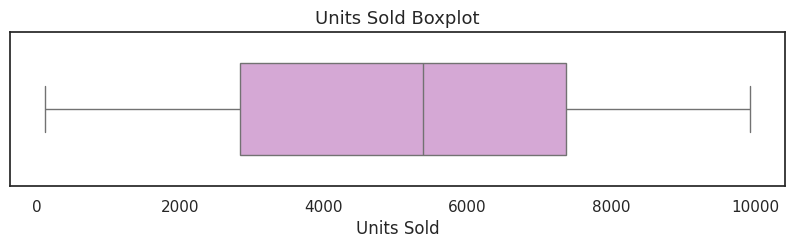

In [37]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(x=data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()


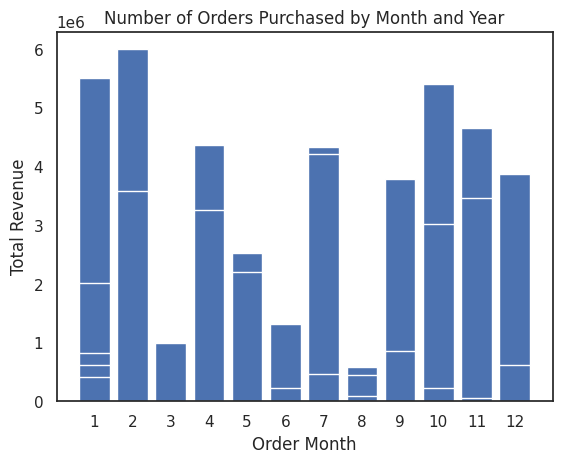

In [38]:
# Creating a bar chart for Total Revenue and Order Month
plt.bar(df['Order Month'], df['Total Revenue'])

# Set the chart title and axis labels
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')

# Rotate the x-axis labels for better readability

# Display the chart
plt.show()

Text(0.5, 1.0, 'Profit per year')

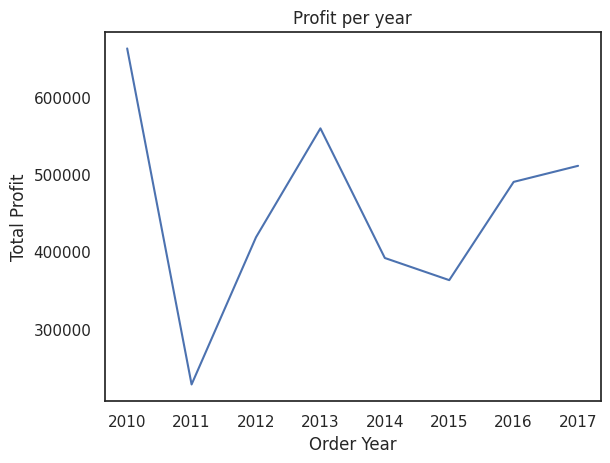

In [39]:
# Plot line graph of Total Profit and Order Year
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [40]:
# Calculating the total revenue for each group with respect to Item Type and then sorting then in descending order
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)
revenue_by_category


Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Snacks              2080733.46
Fruits               466481.34
Name: Total Revenue, dtype: float64

In [41]:
# Calculating the total profit for each group with respect to Item Type and then sorting then in descending order
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)
profit_by_category


Item Type
Cosmetics          14556048.66
Household           7412605.71
Office Supplies     5929583.75
Clothes             5233334.40
Baby Food           3886643.70
Cereal              2292443.43
Vegetables          1265819.63
Personal Care       1220622.48
Beverages            888047.28
Snacks               751944.18
Meat                 610610.00
Fruits               120495.18
Name: Total Profit, dtype: float64

In [42]:
# Calculating correlation of 'Total Revenue', 'Total Cost' and 'Total Profit' columns present in dataframe
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000
